### Todo:
- 

In [1]:
import pandas as pd
import numpy as np


from pathlib import Path

from sklearn import cross_validation
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import math
import time
from  scipy import ndimage
from sklearn.preprocessing import normalize
import scipy

%matplotlib inline
np.random.seed(1)





Using TensorFlow backend.
/Users/Gabriel/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/Gabriel/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Visualize Examples

In [2]:
train_dataset_path = "./datasets/exoTrain.csv"
dev_dataset_path = "./datasets/exoTest.csv"

print("Loading datasets...")
df_train = pd.read_csv(train_dataset_path, encoding = "ISO-8859-1")
df_dev = pd.read_csv(dev_dataset_path, encoding = "ISO-8859-1")
print("Loaded datasets")

Loading datasets...
Loaded datasets


In [3]:
# Process Data
from preprocess_data import LightFluxProcessor

LFP = LightFluxProcessor(
    fourier=False,
    normalize=False,
    gaussian=False,
    standardize=False)

LFP_f = LightFluxProcessor(
    fourier=False,
    normalize=True,
    gaussian=False,
    standardize=True)

LFP_f_n = LightFluxProcessor(
    fourier=False,
    normalize=True,
    gaussian=True,
    standardize=True)

LFP_f_n_g = LightFluxProcessor(
    fourier=True,
    normalize=True,
    gaussian=True,
    standardize=True)

X_train, X_dev = LFP.process(df_train, df_dev)
X_train_f, X_dev_f = LFP_f.process(df_train, df_dev)
X_train_f_n, X_dev_f_n = LFP_f_n.process(df_train, df_dev)
X_train_f_n_g, X_dev_f_n_g = LFP_f_n_g.process(df_train, df_dev)

Standardizing data...
Standardizing data...
Standardizing data...


## Exoplanet Visualized

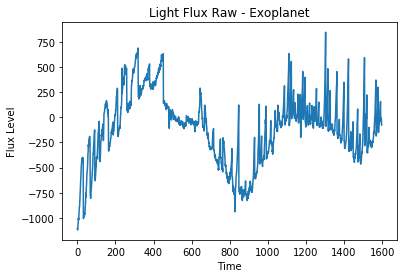

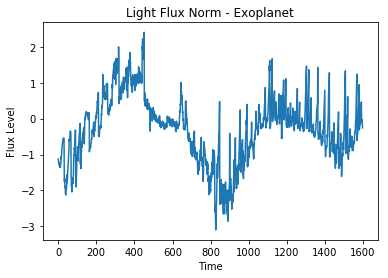

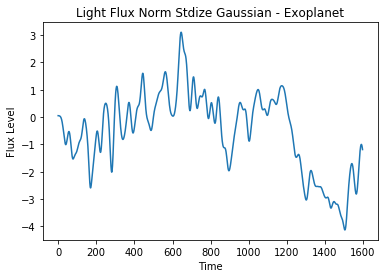

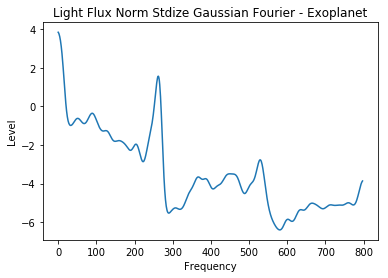

In [11]:
# X_train = df_train.drop('LABEL', axis=1).apply(spectrum_getter,axis=1)
# X_train = pd.DataFrame(normalize(X_train))

# EXOPLANET
row_index = 4
fluxes = X_train.iloc[row_index,1:(X_train.shape[1]//2)].values

plt.plot(fluxes)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Exoplanet")
plt.show()

fluxes = X_train_f[row_index,1:(X_train_f.shape[1]//2)]

plt.plot(fluxes)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Norm - Exoplanet")
plt.show()

fluxes = X_train_f_n[row_index,1:(X_train_f_n.shape[1]//2)]

plt.plot(fluxes)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Norm Stdize Gaussian - Exoplanet")
plt.show()

fluxes = X_train_f_n_g[row_index,1:(X_train_f_n_g.shape[1]//2)]

plt.plot(fluxes)
plt.ylabel('Level')
plt.xlabel('Frequency')
plt.title("Light Flux Norm Stdize Gaussian Fourier - Exoplanet")
plt.show()


## Non - Exoplanet Visualized

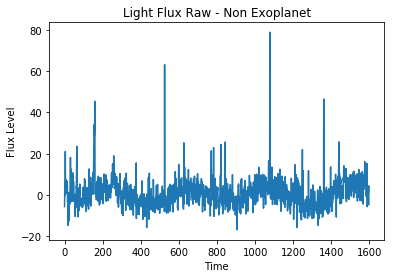

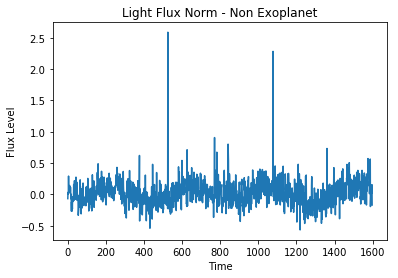

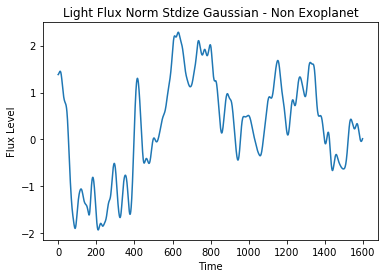

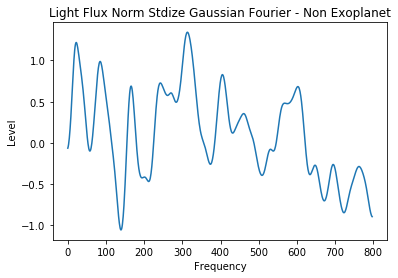

In [12]:
row_index = 150

fluxes_non_exo = X_train.iloc[row_index,1:(X_train.shape[1]//2)].values

plt.plot(fluxes_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

fluxes_non_exo = X_train_f[row_index,1:(X_train_f.shape[1]//2)]

plt.plot(fluxes_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Norm - Non Exoplanet")
plt.show()

fluxes_non_exo = X_train_f_n[row_index,1:(X_train_f_n.shape[1]//2)]

plt.plot(fluxes_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Norm Stdize Gaussian - Non Exoplanet")
plt.show()

fluxes_non_exo = X_train_f_n_g[row_index,1:(X_train_f_n_g.shape[1]//2)]

plt.plot(fluxes_non_exo)
plt.ylabel('Level')
plt.xlabel('Frequency')
plt.title("Light Flux Norm Stdize Gaussian Fourier - Non Exoplanet")
plt.show()